### 1. For the boston dataset given in HW2, create a heatmap with all the features - 1 point

<AxesSubplot:>

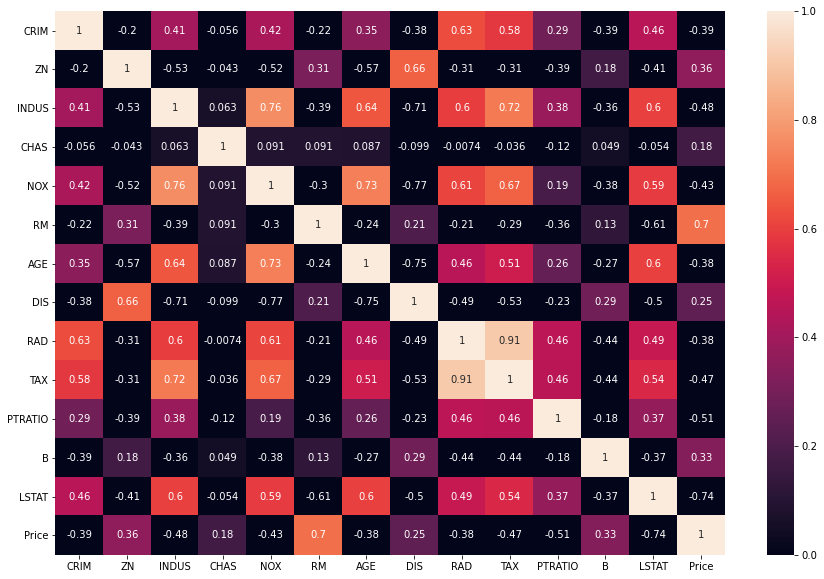

In [309]:
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
boston = load_boston()
#Creating data frame 
data = pd.DataFrame(boston.data, columns=boston.feature_names)
#Adding target value
data['Price'] = pd.Series(data = boston.target, index = data.index)
data.head()
plt.rcParams["figure.figsize"] = (15,10)
sbn.heatmap(data.corr(), annot=True, vmin=0, vmax=1)# correlation analysis describe the nature of the relationship between two variables irrespective of range of features

### 2. Apply feature selection on the dataset. Try to find the top k features which improves the score in the next questions - 1 point each

In [311]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
#Choosing features
X = data.iloc[:,0:13]
Y = data.iloc[:,13:14]
Y.head()
topkfeatures = SelectKBest(score_func=f_regression, k=10) # As it is regression problem, f_regression is used
fit = topkfeatures.fit(X,np.ravel(Y,order='C'))
#fit = topkfeatures.fit(X,Y)
scores = pd.DataFrame(fit.scores_)#f_regression scores of the top 10 features selected
columns = pd.DataFrame(X.columns)
featureScores = pd.concat([columns,scores],axis=1)# Concatinating scores and column names by column
featureScores.columns = ['Features', 'Score']
#Printing top 10 features
print(featureScores.nlargest(10,'Score'))


   Features       Score
12    LSTAT  601.617871
5        RM  471.846740
10  PTRATIO  175.105543
2     INDUS  153.954883
9       TAX  141.761357
4       NOX  112.591480
0      CRIM   89.486115
8       RAD   85.914278
6       AGE   83.477459
1        ZN   75.257642


In [312]:
#Selecting top k features after standardizing data
from sklearn.preprocessing import MinMaxScaler
X = data.iloc[:,0:13]
Y = data.iloc[:,13:14]
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
scaler.fit(Y)
Y_scaled = scaler.transform(Y)
topkfeatures = SelectKBest(score_func=f_regression, k=10)
fit = topkfeatures.fit(X_scaled,np.ravel(Y_scaled,order='C'))
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features', 'Score']
#Printing top 10 features
print(featureScores.nlargest(10,'Score'))

   Features       Score
12    LSTAT  601.617871
5        RM  471.846740
10  PTRATIO  175.105543
2     INDUS  153.954883
9       TAX  141.761357
4       NOX  112.591480
0      CRIM   89.486115
8       RAD   85.914278
6       AGE   83.477459
1        ZN   75.257642


It can be observed that scores of features selected are same before and after standardizing data.

### 3. Apply Linear regression and Ridge regression and plot the coefficient for each feature. Try different aplha values as well and comment what do you observe. -3 points

Use different marker for each model if plotting in same figure.

         Coefficient
LSTAT      -0.489809
RM          0.414814
PTRATIO    -0.192191
INDUS       0.019504
TAX        -0.014630


Text(0.5, 1.0, 'Feature coefficients for Linear Regression')

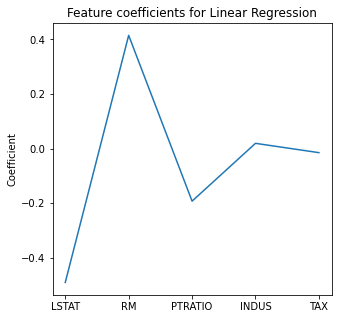

In [316]:
# Using Linear regression
# Using top 5 features from above calculations
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
import seaborn as sbn
X = data.loc[:,['LSTAT','RM','PTRATIO','INDUS','TAX']]
X_selected = data.loc[:,['LSTAT','RM','PTRATIO','INDUS','TAX']]
#X_selected.head()
Y_selected = data.loc[:,['Price']]
#Y_selected.head()
#Preprocessing data
scalar = MinMaxScaler()
scalar.fit(X_selected)
X_selected = scalar.transform(X_selected)
scalar.fit(Y_selected)
Y_selected = scalar.transform(Y_selected)
#Split data set into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y_selected, test_size = 0.3, random_state=1)
#Predicting values using Linear Regression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
#Calculating coefficient of features
coeff = DataFrame(regressor.coef_)
coeff.columns = X.columns
coeff = coeff.T
coeff.columns = ['Coefficient']
print(coeff) # Feature coefficients
plt.rcParams["figure.figsize"] = (5,5)
sbn.lineplot(x=coeff.index,y=coeff.Coefficient)
plt.title('Feature coefficients for Linear Regression')




In [318]:
# Testing Linear regression model
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = regressor.predict(X_train)
mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)
rsq = r2_score(y_train,y_pred_train)
print('r2-square, Training: ',rsq)
rsq = r2_score(y_test,y_pred)
print('r2-square, Testing: ',rsq)


Mean Squared Error:  0.012419015569986848
r2-square, Training:  0.6510539090721245
r2-square, Testing:  0.7256161992233838


It can be observed that r2_score for training and testing are similar.Hence model is good fit.5 features are selected using SelectKBest to ensure model is good ffit.

In [336]:
# Using Ridge regression
from sklearn.linear_model import Ridge, RidgeCV
X = data.loc[:,['LSTAT','RM','PTRATIO','INDUS','TAX']]
Y = data.loc[:,['Price']]
# Preprocessing data
scalar = MinMaxScaler()
scalar.fit(X)
X_scaled = scalar.transform(X)
scalar.fit(Y)
Y_scaled = scalar.transform(Y)
#Split data set into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y_selected, test_size = 0.3, random_state=2)

In [327]:
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20] # Checking alpha for different values
#alphas = [1e-3, 1e-2, 1, 5, 10]
alphas
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.extend(ridge.coef_)
# Feature coefficients data
coef = DataFrame(coefs)
coef.insert(loc=0, column= 'Alphas', value = alphas)
coef.columns =['Alphas','LSTAT', 'RM', 'PTRATIO', 'INDUS','TAX'] 
print("Feature coefficients for different values alpha")
coef
# ax = plt.gca()
# ax.plot(alphas, coefs)
# plt.xticks(alphas,alphas)
# plt.figure(figsize=(20,10))
#plt.plot(alphas,coefs)
# plt.plot(ridge.coef_,alpha=0.7)
# plt.plot(regressor.coef_,alpha=0.4)

Feature coefficients for different values alpha


,Alphas,LSTAT,RM,PTRATIO,INDUS,TAX
0,1.000000e-15,-0.497001,0.497430,-0.193954,0.042383,-0.030518
1,1.000000e-10,-0.497001,0.497430,-0.193954,0.042383,-0.030518
2,1.000000e-08,-0.497001,0.497430,-0.193954,0.042383,-0.030518
3,1.000000e-04,-0.496998,0.497424,-0.193954,0.042380,-0.030518
4,1.000000e-03,-0.496966,0.497366,-0.193952,0.042354,-0.030520
5,1.000000e-02,-0.496650,0.496794,-0.193934,0.042092,-0.030536
6,1.000000e+00,-0.463208,0.443189,-0.190938,0.017394,-0.033404
7,5.000000e+00,-0.363053,0.319752,-0.172543,-0.034917,-0.049620
8,1.000000e+01,-0.289384,0.243063,-0.151463,-0.058810,-0.063915
9,2.000000e+01,-0.211036,0.168171,-0.121993,-0.070987,-0.075342


Text(0, 0.5, 'Coefficients')

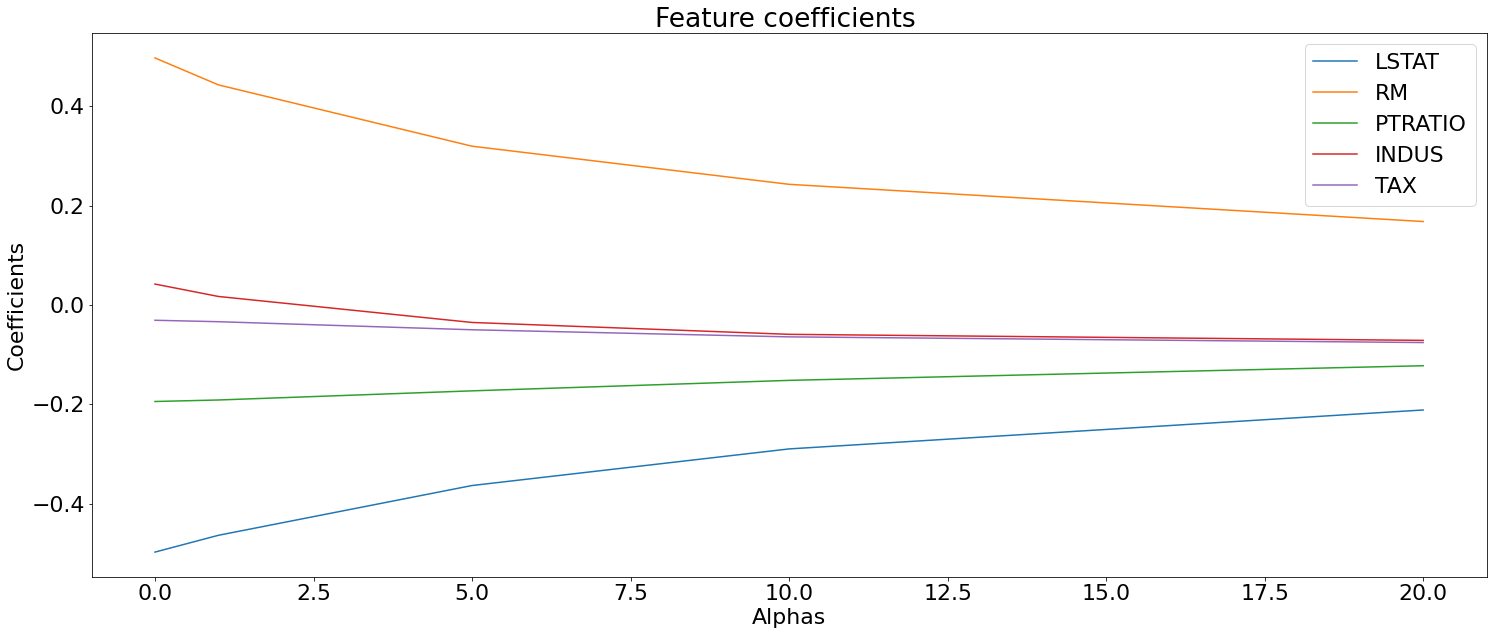

In [454]:
fig=coef.set_index('Alphas').astype(float).plot()
fig.set_title('Feature coefficients ')
plt.ylabel('Coefficients')
#plt.rcParams["figure.figsize"] = (25,10)

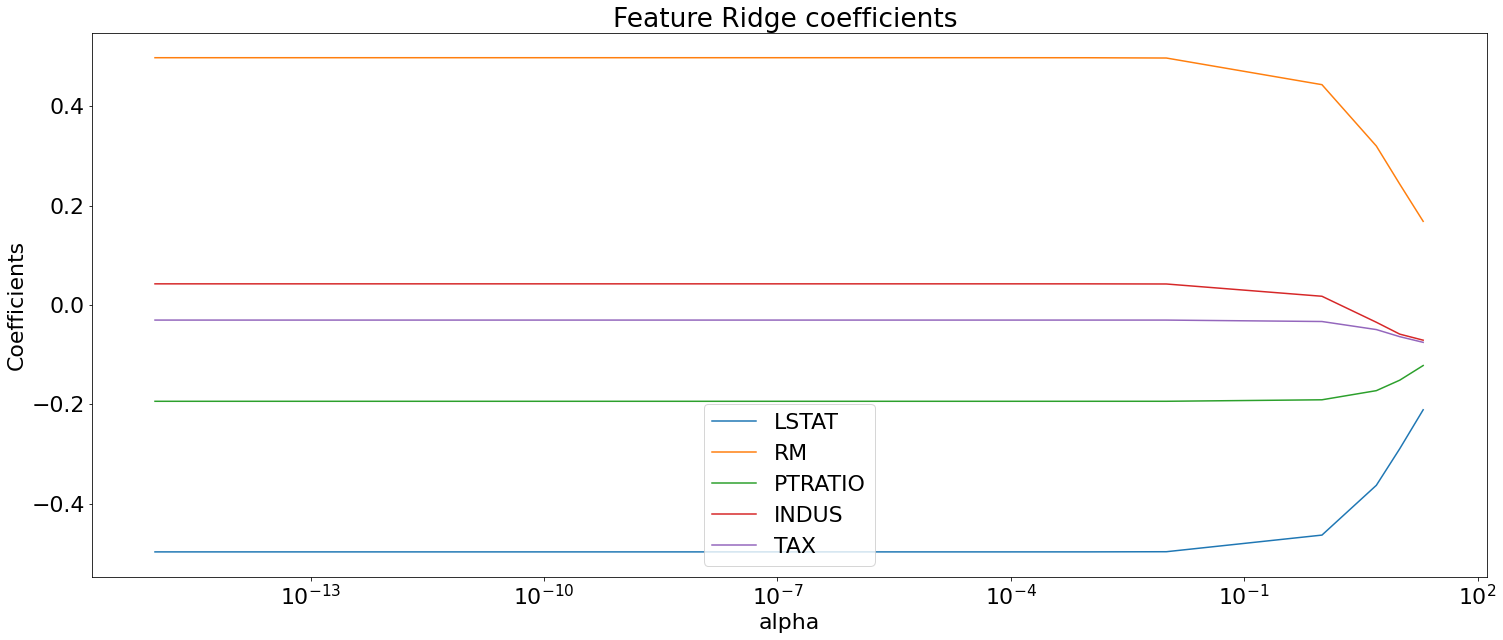

In [455]:
#Plot using index method
ax=coef.set_index('Alphas').astype(float).plot()
ax.set_xlabel('Alpha')
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.set_ylim([0,1])
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Feature Ridge coefficients ')
plt.axis('tight')
plt.show()

1.It can be observed that for alpha = 1 feature coefficients are similar for Linear regression and Ridge regression 
2.As alpha value increases in Ridge regression, feature coefficients decreases but do not become zero.
3.Significant higher values of alpha can cause underfitting as lesser emphasis is placed on features and lower alpha values might lead to overfitting as it places higher emphasis on features
4.Higher the alpha value lesser is the model complexity and lower the alpha value higher the model complexity
5.To choose appropriate alpha, cross validation technique is used below

In [339]:
# Creating ridge regression with an alpha value
regressor = RidgeCV(alphas=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20])
model = regressor.fit(X_train,y_train)
print("Alpha chosen through cross validation")
print(model.alpha_)
print("\n")
ridge = Ridge(alpha= model.alpha_)
y_pred = regressor.predict(X_test)
rsq = r2_score(y_test,y_pred)
print("r2_score")
print(rsq)

Alpha chosen through cross validation
1.0


r2_score
0.7103267231315196


### 4. Use the HCC.csv file. Split the data into 70:30. Apply Ridge and lasso regression on the data to predict alive or dead. -5 points

In this question you are expected to figure out the difference between the two regularization technique as well as when to use which. Comment your findings. Try plotting coefficents as well for better understanding.

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
import seaborn as sbn
from sklearn.linear_model import Ridge, RidgeCV
data = pd.read_csv('HCC.csv')
#data.head()
data.shape

(156, 41)

In [28]:
#Preprocessing data
data.isnull().sum() # No missing or null values
# corr = data.corr()
# corr
cols = data.columns
num_cols = data._get_numeric_data().columns # to check for Categorical columns 
cols
data = data.iloc[:,1:42]
data.shape

(156, 40)

In [29]:
data = data.drop_duplicates(subset=None,keep='first',inplace=False) # Removing duplicates in data
data.shape

(156, 40)

In [30]:
corr = data.corr()
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)) # Selecting upper triangle of correlation matrix
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] # Removing highly correlated 
print(to_drop)# No columns with multicollinearity
corr

[]


,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,13.Hem,...,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod,Class
1.Gen,1.000000,0.087718,0.406802,0.152549,0.031930,-0.018247,0.178413,0.118114,-0.070462,0.101375,...,0.118623,0.112612,0.144396,0.066641,-0.025383,0.098344,0.049163,-0.175890,-0.017631,-0.020314
2.Sym,0.087718,1.000000,0.013666,0.096236,0.123294,-0.015872,-0.054699,-0.124415,-0.089272,0.024726,...,0.049951,0.074295,0.086773,0.104577,0.189750,0.065233,-0.043758,0.047230,0.165485,-0.224530
3.Alc,0.406802,0.013666,1.000000,-0.073731,-0.104877,-0.099986,0.404593,0.042626,0.078598,0.120860,...,0.104959,0.013107,0.056181,0.101108,-0.004180,-0.114589,0.027772,0.007815,-0.150817,-0.061955
4.HepB,0.152549,0.096236,-0.073731,1.000000,0.422788,-0.053444,0.094155,-0.184506,-0.125078,-0.070696,...,0.002410,0.052009,0.042844,-0.021528,-0.014545,-0.046588,0.021046,0.093184,0.156263,0.075019
6.HepB,0.031930,0.123294,-0.104877,0.422788,1.000000,0.241340,0.107775,-0.274553,0.005727,-0.050865,...,-0.108296,0.246051,0.166508,-0.003497,-0.089119,0.141081,-0.034849,-0.039044,-0.126522,0.073039
7.HepC,-0.018247,-0.015872,-0.099986,-0.053444,0.241340,1.000000,0.083473,-0.045437,-0.094870,0.047255,...,0.138783,0.327273,0.297336,0.042266,-0.032963,0.061485,0.139163,0.023314,-0.064968,-0.075384
8.Cir,0.178413,-0.054699,0.404593,0.094155,0.107775,0.083473,1.000000,0.051031,0.110702,0.062570,...,0.117664,0.164375,0.130444,0.022644,-0.167419,-0.083722,-0.007063,0.094775,-0.290156,0.022895
11.Dia,0.118114,-0.124415,0.042626,-0.184506,-0.274553,-0.045437,0.051031,1.000000,0.094907,0.043790,...,-0.071706,-0.092642,-0.117573,-0.054258,-0.086635,-0.056675,-0.000004,-0.041722,0.014031,-0.093470
12.Obe,-0.070462,-0.089272,0.078598,-0.125078,0.005727,-0.094870,0.110702,0.094907,1.000000,0.009499,...,0.068222,0.075334,0.090739,-0.001197,-0.004116,0.024000,-0.063973,-0.001036,0.000787,0.022304
13.Hem,0.101375,0.024726,0.120860,-0.070696,-0.050865,0.047255,0.062570,0.043790,0.009499,1.000000,...,0.009189,0.053318,-0.029474,-0.009017,0.012309,-0.031214,-0.075034,-0.143176,-0.070836,-0.022512


In [31]:
#Ridge Regression
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.metrics import mean_squared_error, r2_score
data.shape
X = data.iloc[:,0:39]
X.head()
X.shape
Y = data.iloc[:,39:40] 
#Preprocessing data
scalar = MinMaxScaler()
scalar.fit(X)
X_scaled = scalar.transform(X)
scalar.fit(Y)
Y_scaled = scalar.transform(Y)
#Split data set into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.3, random_state=3)
#Predicting values using Ridge Regression
alphas = np.logspace(-3, 4, num=25)
ridgecv = RidgeCV(alphas) # Selecting good fit alpha value from cross validation technique
ridgecv.fit(X_train, y_train)
print("Best fit alpha value")
print(ridgecv.alpha_)
# Fitting model with best fit alpha value
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train,y_train)
y_train_pred = ridge.predict(X_train)
y_pred_ridge = ridge.predict(X_test)
mse = mean_squared_error(y_pred_ridge, y_test)
print("MSE for Ridge Regression")
print(mse)
r2_score_ridge = r2_score(y_pred_ridge, y_test)
print("r2 score for test data")
print(r2_score_ridge)
print("r2 score for training data")
print(r2_score(y_train_pred,y_train))

Best fit alpha value
23.71373705661655
MSE for Ridge Regression
0.2134649890000807
r2 score for test data
-12.272202568021989
r2 score for training data
-5.937917222383859


In [32]:
featurecoef=[]
for alpha in alphas:
    estimator = Ridge(alpha = alpha)
    estimator.fit(X_train,y_train)
    featurecoef.extend(estimator.coef_)
feature_coef = DataFrame(featurecoef)
feature_coef.columns = X.columns 
feature_coef.insert(loc=0, column= 'Alphas', value = alphas)
print("Ridge Feature Coefficients")
feature_coef

Ridge Feature Coefficients


,Alphas,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,...,36.Alb,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod
0,0.001000,0.096796,-0.167637,0.051638,0.255670,-0.174513,-0.100043,-0.211981,-0.273103,0.189310,...,-0.126018,-0.463781,0.932149,-0.783009,0.057836,-0.695118,-0.187134,-0.256560,-0.114825,0.040416
1,0.001957,0.096781,-0.167694,0.051602,0.255720,-0.174450,-0.099876,-0.211939,-0.273107,0.189238,...,-0.125931,-0.463618,0.929822,-0.781140,0.057644,-0.694257,-0.187087,-0.256889,-0.114609,0.040250
2,0.003831,0.096750,-0.167804,0.051531,0.255815,-0.174328,-0.099553,-0.211854,-0.273116,0.189096,...,-0.125761,-0.463302,0.925305,-0.777514,0.057271,-0.692582,-0.186996,-0.257525,-0.114190,0.039930
3,0.007499,0.096691,-0.168017,0.051390,0.255992,-0.174087,-0.098931,-0.211680,-0.273129,0.188818,...,-0.125422,-0.462686,0.916610,-0.770536,0.056549,-0.689337,-0.186819,-0.258731,-0.113387,0.039320
4,0.014678,0.096576,-0.168420,0.051109,0.256306,-0.173615,-0.097756,-0.211310,-0.273149,0.188270,...,-0.124744,-0.461491,0.900123,-0.757310,0.055171,-0.683116,-0.186480,-0.260952,-0.111875,0.038184
5,0.028730,0.096352,-0.169166,0.050542,0.256803,-0.172690,-0.095604,-0.210484,-0.273162,0.187184,...,-0.123366,-0.459194,0.869750,-0.732963,0.052593,-0.671407,-0.185839,-0.264807,-0.109126,0.036168
6,0.056234,0.095917,-0.170472,0.049388,0.257395,-0.170871,-0.091881,-0.208554,-0.273101,0.185026,...,-0.120514,-0.454824,0.816618,-0.690424,0.047939,-0.650079,-0.184658,-0.270763,-0.104434,0.032894
7,0.110069,0.095049,-0.172553,0.047062,0.257477,-0.167310,-0.086038,-0.203994,-0.272725,0.180763,...,-0.114573,-0.446607,0.731454,-0.622333,0.039968,-0.613294,-0.182548,-0.277913,-0.097244,0.028393
8,0.215443,0.093233,-0.175357,0.042643,0.255229,-0.160449,-0.078156,-0.193815,-0.271362,0.172598,...,-0.102597,-0.431307,0.611965,-0.526780,0.027286,-0.554948,-0.178831,-0.281727,-0.087895,0.023896
9,0.421697,0.089361,-0.178172,0.035294,0.247250,-0.147869,-0.069513,-0.174066,-0.267562,0.158079,...,-0.080734,-0.403373,0.471278,-0.413489,0.009215,-0.472766,-0.172014,-0.273149,-0.078086,0.021885


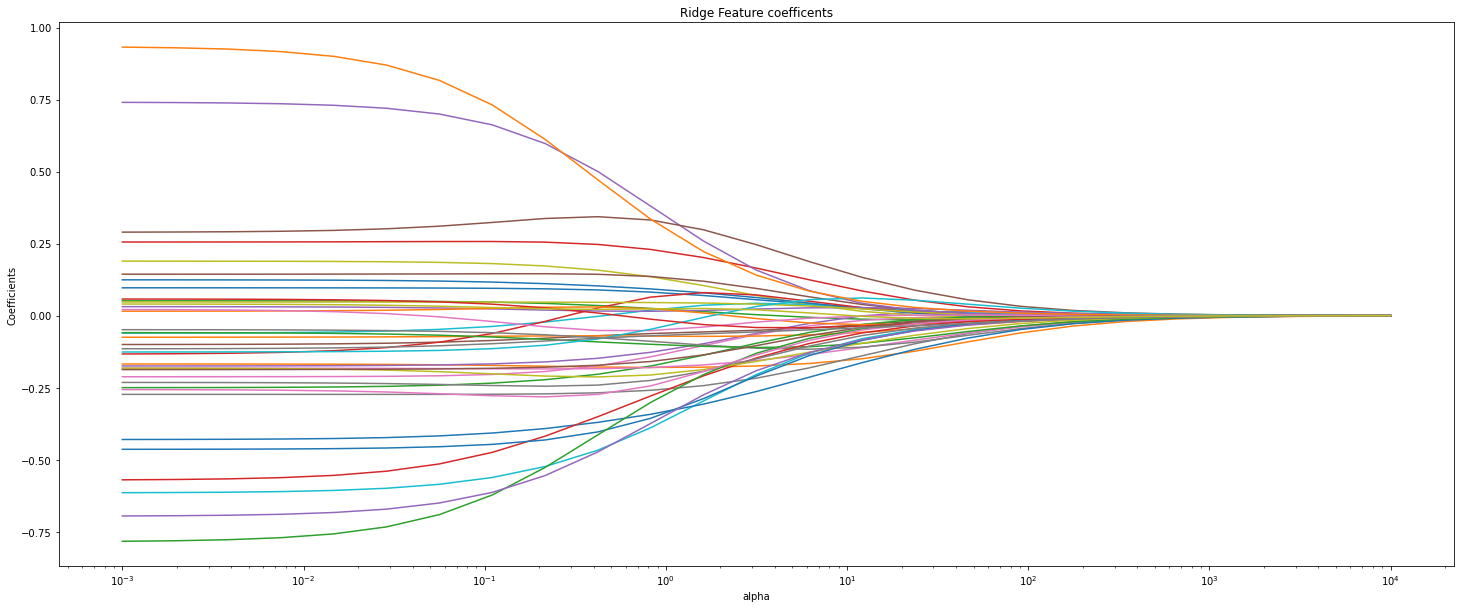

In [34]:
ax = plt.gca()
ax.plot(alphas, featurecoef)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.set_ylim([0,1])
plt.xlabel('alpha')
plt.rcParams["figure.figsize"] = (25,10)
plt.ylabel('Coefficients')
plt.title('Ridge Feature coefficents')
plt.axis('tight')
plt.show()

In [10]:
#Classifying if Alive or Dead
target = DataFrame(y_pred_ridge)
target.columns = ['Class']
target['Class'] = np.where(target['Class'] > 0.7, 'Alive', 'Dead') # Threshold value = 0.7 - Predicted values greater than 0.7 considered as Alive  
print(target)

    Class
0   Alive
1   Alive
2    Dead
3   Alive
4    Dead
5    Dead
6   Alive
7    Dead
8   Alive
9    Dead
10   Dead
11   Dead
12   Dead
13   Dead
14  Alive
15  Alive
16   Dead
17  Alive
18   Dead
19   Dead
20  Alive
21  Alive
22   Dead
23  Alive
24   Dead
25   Dead
26   Dead
27   Dead
28   Dead
29  Alive
30   Dead
31  Alive
32   Dead
33   Dead
34   Dead
35   Dead
36  Alive
37   Dead
38   Dead
39  Alive
40   Dead
41  Alive
42   Dead
43   Dead
44   Dead
45   Dead
46   Dead


In [35]:
# Lasso Regression
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, Lasso
from sklearn.metrics import mean_squared_error, r2_score
X = data.iloc[:,0:39]
X.head()
X.shape
Y = data.iloc[:,39:40] # Saving survival to target 
#Preprocessing data
scalar = MinMaxScaler()
scalar.fit(X)
X_scaled = scalar.transform(X)
scalar.fit(Y)
Y_scaled = scalar.transform(Y)
#Split data set into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.3, random_state=4)
#Predicting values using Lasso Regression
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
#lassocv = LassoCV(alphas = [np.logspace(-1, 3, num=25)], max_iter = 100000) # Selecting good fit alpha value from different values
lassocv = LassoCV(alphas = alphas, max_iter = 100000)
lassocv.fit(X_train, np.ravel(y_train,order='C'))
print("Best fit alpha value")
print(lassocv.alpha_)
# Fitting model with best fit alpha value
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_pred_lasso = lasso.predict(X_test)
mse = mean_squared_error(y_pred_lasso, y_test)
print("MSE for Lasso Regression")
print(mse)
r2_score_ridge = r2_score(y_pred_lasso, y_test)
print("r2 score for test data")
print(r2_score_ridge)
print("r2 score for training data")
print(r2_score(y_train_pred,y_train))

Best fit alpha value
0.01
MSE for Lasso Regression
0.20608238894580203
r2 score for test data
-3.904026442965206
r2 score for training data
-1.9375907797448542


Text(0, 0.5, 'Coefficients')

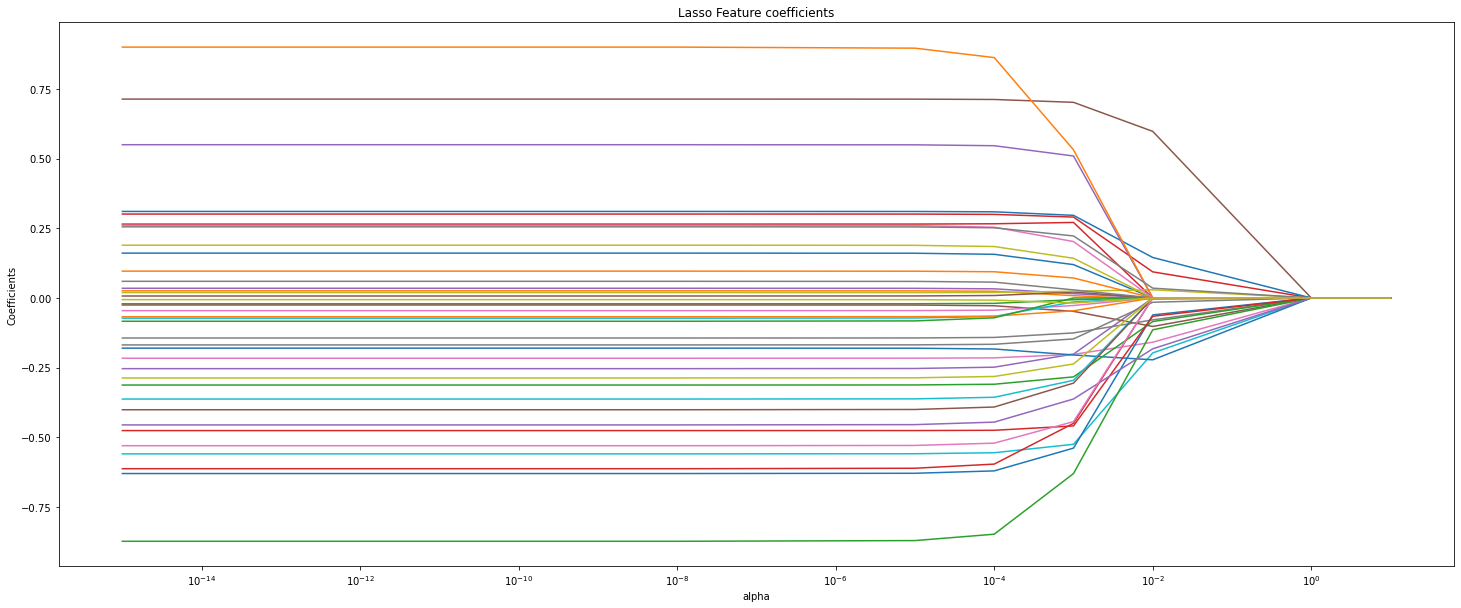

In [36]:
lasso = Lasso(max_iter = 100000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit((X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.title('Lasso Feature coefficients')
plt.axis('tight')
plt.xlabel('alpha')
plt.rcParams["figure.figsize"] = (25,10)
plt.ylabel('Coefficients')

In [21]:
coef_lasso = np.array(coefs)
coef_lasso = DataFrame(coefs)
coef_lasso.columns = X.columns 
coef_lasso.insert(loc=0, column= 'Alphas', value = alphas)
coef_lasso

,Alphas,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,...,36.Alb,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod
0,1.000000e-15,0.160870,0.025683,-0.020820,0.301000,-0.253440,-0.025081,-0.045447,-0.168350,0.189307,...,-0.362482,-0.629659,0.899743,-0.872665,-0.475596,-0.455243,-0.400888,-0.529812,0.255180,-0.286848
1,1.000000e-10,0.160870,0.025683,-0.020820,0.301000,-0.253440,-0.025081,-0.045447,-0.168350,0.189307,...,-0.362482,-0.629659,0.899742,-0.872665,-0.475596,-0.455243,-0.400888,-0.529812,0.255180,-0.286848
2,1.000000e-08,0.160869,0.025683,-0.020820,0.301000,-0.253439,-0.025082,-0.045447,-0.168350,0.189306,...,-0.362481,-0.629658,0.899739,-0.872662,-0.475596,-0.455242,-0.400887,-0.529811,0.255179,-0.286847
3,1.000000e-05,0.160443,0.025531,-0.020668,0.300876,-0.252913,-0.025356,-0.045283,-0.168123,0.188831,...,-0.361839,-0.628710,0.895955,-0.870104,-0.475513,-0.454231,-0.399914,-0.528897,0.254833,-0.286314
4,1.000000e-04,0.156623,0.024138,-0.019316,0.299782,-0.248202,-0.027843,-0.043787,-0.166093,0.184550,...,-0.356128,-0.620164,0.862187,-0.847256,-0.474584,-0.445302,-0.391129,-0.520673,0.251700,-0.281518
5,1.000000e-03,0.119615,0.008316,-0.006237,0.290145,-0.201252,-0.047974,-0.026969,-0.146845,0.142440,...,-0.295364,-0.538475,0.531346,-0.629836,-0.458999,-0.362345,-0.305390,-0.443517,0.222501,-0.236720
6,1.000000e-02,0.000000,-0.004407,-0.000000,0.093638,-0.000000,-0.102128,-0.000000,-0.015357,-0.000000,...,-0.000000,-0.060718,-0.000000,-0.114168,-0.065728,-0.182254,-0.000000,-0.000000,0.035235,-0.000000
7,1.000000e+00,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
8,5.000000e+00,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
9,1.000000e+01,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000


In [23]:
#Classifying if Dead or Alive
target = DataFrame(y_pred_lasso)
target.columns = ['Class']
target['Class'] = np.where(target['Class'] > 0.7, 'Alive', 'Dead') # Threshold value = 0.7 - Predicted values greater than 0.7 considered as Alive  
print(target)

    Class
0   Alive
1    Dead
2    Dead
3    Dead
4    Dead
5   Alive
6    Dead
7   Alive
8    Dead
9    Dead
10   Dead
11  Alive
12   Dead
13   Dead
14  Alive
15  Alive
16  Alive
17   Dead
18  Alive
19  Alive
20  Alive
21  Alive
22   Dead
23  Alive
24   Dead
25   Dead
26   Dead
27  Alive
28   Dead
29  Alive
30   Dead
31   Dead
32  Alive
33   Dead
34   Dead
35  Alive
36  Alive
37   Dead
38   Dead
39   Dead
40   Dead
41  Alive
42  Alive
43  Alive
44   Dead
45  Alive
46  Alive


1.It can be observed that r2_score for LASSO regression is higher than Ridge regression. 
2.It is also observed that Features in given data set do not have multicollinearity (Code line number - 343 in this notebook)
3.Thus, LASSO works well when there is no multicollinearity in data set
4.If data has multicollinearity LASSO arbitrarily selects any one feature among the highly correlated ones and reduces the coefficients of the rest to zero which does not result in good model
5.Feature coefficients of Ridge regression decreases as alpha value increases but did not become zero whereas feature coefficients in LASSO were set to zero as alpha value increases (Can be observed from Feature coefficient plots)
4.LASSO provides sparse solutions and does feture extraction.(It can be observed from above feature coefficient values that features with zero coefficient are removed)
5.LASSO performs better if there are  small number of significant parameters and the others are close to zero i.e when only a few predictors  influence the response
6.Ridge works well if there are many large parameters of about the same value i.e when many features impact the response

In [433]:
#Selecting top features from dataset to improve model
topfeatures = SelectKBest(f_regression, k=10) # Since it is regression problem,f_regression is used
fit = topkfeatures.fit(X,np.ravel(Y,order='C'))
#fit = topkfeatures.fit(X,Y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features', 'Score']
#Printing top 10 features
print(featureScores.nlargest(10,'Score'))


         Features      Score
20         27.Sta  24.027492
25         32.Hae  18.895743
29         36.Alb  13.776551
34         41.Alk  12.018446
22      29.Ascdeg  10.814837
16         21.Thr   9.918332
17        22.LMet   8.494680
1           2.Sym   8.175927
30         37.Bil   7.302181
23   30.IntNorRat   6.628570


Best fit alpha value
90.8517575651688
MSE for Ridge Regression
0.1771155670049309
r2 score for Ridge regression
-3.8451919547588282
-3.5261772613926867


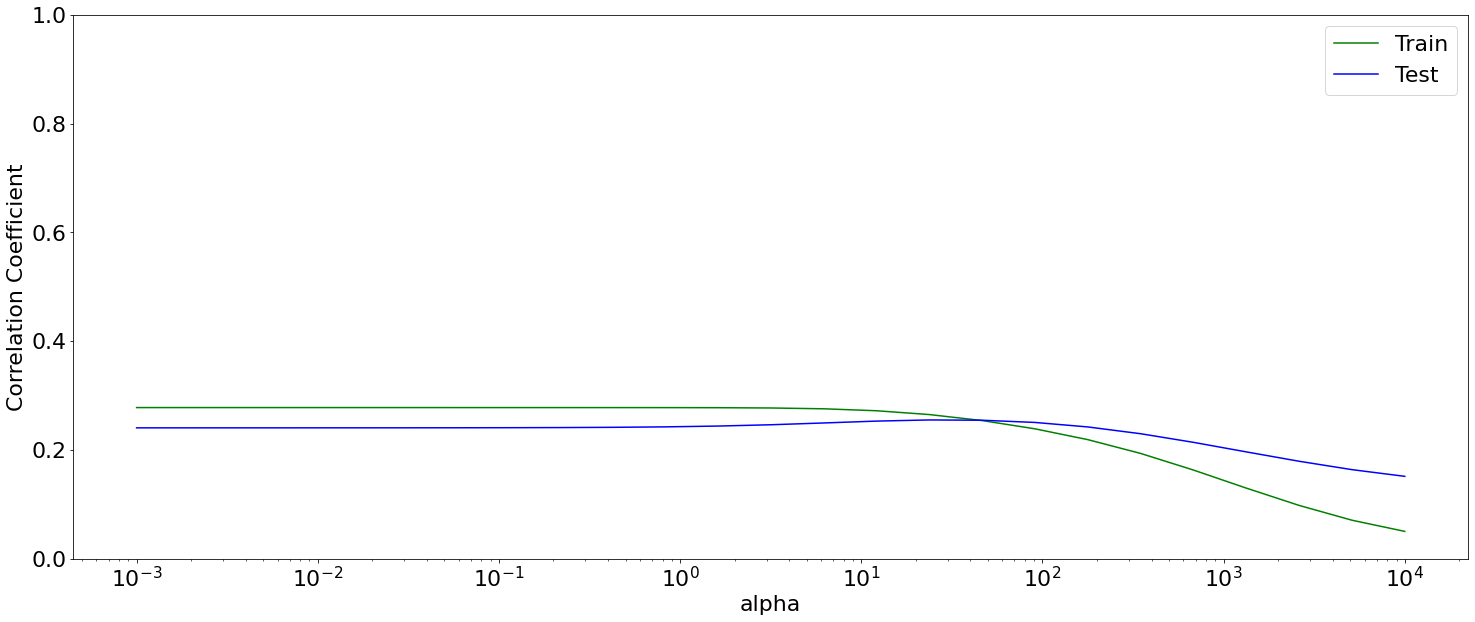

In [436]:
#Feature Selection
X_selected = SelectKBest(f_regression, k=10).fit_transform(X, np.ravel(Y,order='C'))
#Divide into training and test-set
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.30, random_state = 5)
X_train.shape
# Estimating better alpha value
alphas = np.logspace(-3, 4, num=25)
fitscores = []
predictscores = []
featurecoef = []
for alpha in alphas:
    estimator = Ridge(alpha = alpha)
    estimator.fit(X_train,y_train)
    fitscores.append(estimator.score(X_train,y_train)) # scores for the fit of the training set
    predictscores.append(estimator.score(X_test,y_test)) # scores for the fit of the testing set
    featurecoef.extend(estimator.coef_)
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alphas, fitscores,'g', label = 'Train')
ax.plot(alphas, predictscores,'b', label = 'Test')
#Set limits and titles
plt.ylim([0,1])
plt.xlabel('alpha')
plt.ylabel('Correlation Coefficient')
plt.legend()
plt.plot
alpha_value = RidgeCV(alphas) # Selecting good fit alpha value
alpha_value.fit(X_train, y_train)
print("Best fit alpha value")
print(alpha_value.alpha_)
ridge = Ridge(alpha=alpha_value.alpha_)
ridge.fit(X_train,y_train)
y_train_pred = ridge.predict(X_train)
y_pred_ridge = ridge.predict(X_test)
mse = mean_squared_error(y_pred_ridge, y_test)
print("MSE for Ridge Regression")
print(mse)
r2_score_ridge = r2_score(y_pred_ridge, y_test)
print("r2 score for Ridge regression")
print(r2_score_ridge)
print(r2_score(y_train_pred,y_train))
#print(y_pred_ridge)

1.It can be observed that r2 score for training and testing is similar which shows it is a good model.
2.From the plot, it can be seen that at alpha between(10,100) training and testing evaluation scores are similar hence alpha value can be tuned to value between (10,100)
3.Using cross validation technique alpha tuned to 90.8 

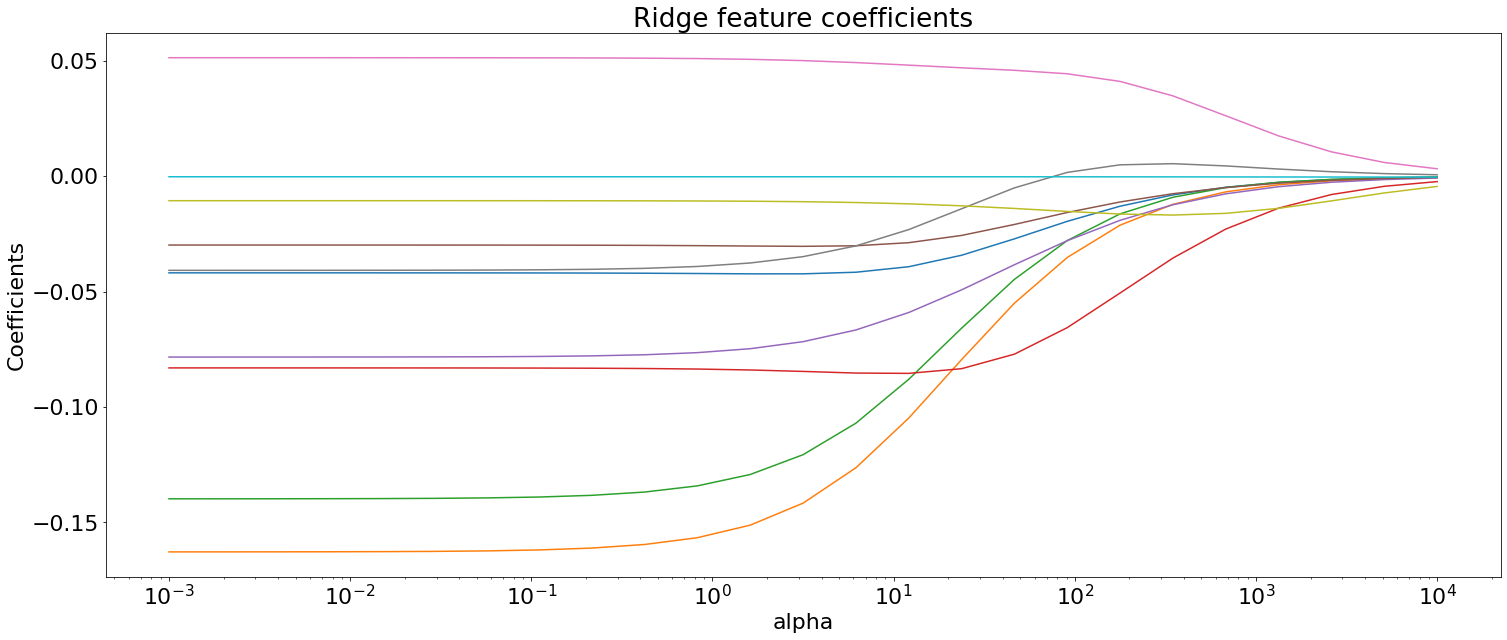

In [437]:
ax = plt.gca()
ax.plot(alphas, featurecoef)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.set_ylim([0,1])
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge feature coefficients')
plt.axis('tight')
plt.show()


In [438]:
featurecoef = np.array(featurecoef)
featurecoef.shape

(25, 10)

In [439]:
feature_coef = DataFrame(featurecoef)
feature_coef.insert(loc=0, column= 'Alphas', value = alphas)
feature_coef.columns =['Alphas','Sta','Hae','Alb','Alk','Ascdeg','Thr','LMet','Sym','Bil','IntNorRat'] 
feature_coef
# Feature coefficients of selected features

,Alphas,Sta,Hae,Alb,Alk,Ascdeg,Thr,LMet,Sym,Bil,IntNorRat
0,0.001000,-0.041873,-0.162750,-0.139758,-0.083053,-0.078352,-0.029827,0.051317,-0.040787,-0.010620,-0.000247
1,0.001957,-0.041873,-0.162743,-0.139751,-0.083053,-0.078349,-0.029828,0.051316,-0.040785,-0.010620,-0.000247
2,0.003831,-0.041874,-0.162728,-0.139737,-0.083054,-0.078345,-0.029828,0.051315,-0.040782,-0.010621,-0.000247
3,0.007499,-0.041875,-0.162700,-0.139711,-0.083057,-0.078336,-0.029830,0.051314,-0.040774,-0.010621,-0.000247
4,0.014678,-0.041879,-0.162644,-0.139660,-0.083061,-0.078319,-0.029833,0.051310,-0.040759,-0.010622,-0.000247
5,0.028730,-0.041885,-0.162535,-0.139561,-0.083070,-0.078285,-0.029838,0.051303,-0.040730,-0.010624,-0.000247
6,0.056234,-0.041897,-0.162322,-0.139366,-0.083088,-0.078219,-0.029849,0.051290,-0.040673,-0.010628,-0.000247
7,0.110069,-0.041921,-0.161906,-0.138986,-0.083123,-0.078091,-0.029869,0.051265,-0.040561,-0.010636,-0.000247
8,0.215443,-0.041964,-0.161100,-0.138250,-0.083189,-0.077842,-0.029907,0.051216,-0.040344,-0.010652,-0.000247
9,0.421697,-0.042041,-0.159547,-0.136834,-0.083315,-0.077360,-0.029977,0.051121,-0.039923,-0.010683,-0.000248


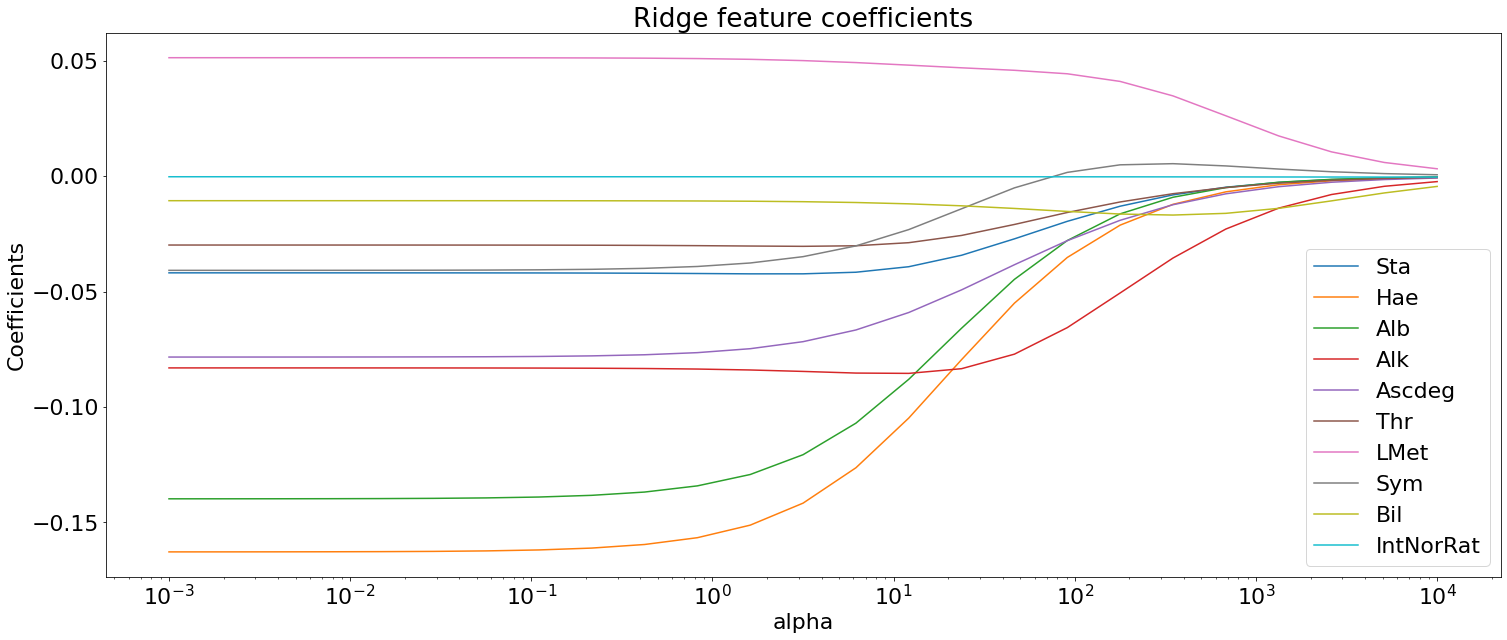

In [442]:
#Plotting Ridge feature coefficients using index method
ax=feature_coef.set_index('Alphas').astype(float).plot()
ax.set_xlabel('Alpha')
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.set_ylim([0,1])
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge feature coefficients')
plt.axis('tight')
plt.show()

In [456]:
# Using Lasso Regression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
data = pd.read_csv('HCC.csv')
print(data.shape)
# Removing first column
data = data.iloc[:,1:]
print(data.shape)
# Checking for missing values
data.isnull().sum() # No missing values in data
# Checking if there are categorical variables
num_cols = data._get_numeric_data().columns 
print(num_cols.shape) # No categorical columns , hence no encoding required


(156, 41)
(156, 40)
(40,)


        Specs      Score
20     27.Sta  24.027492
25     32.Hae  18.895743
29     36.Alb  13.776551
34     41.Alk  12.018446
22  29.Ascdeg  10.814837


Text(0, 0.5, 'Coefficients')

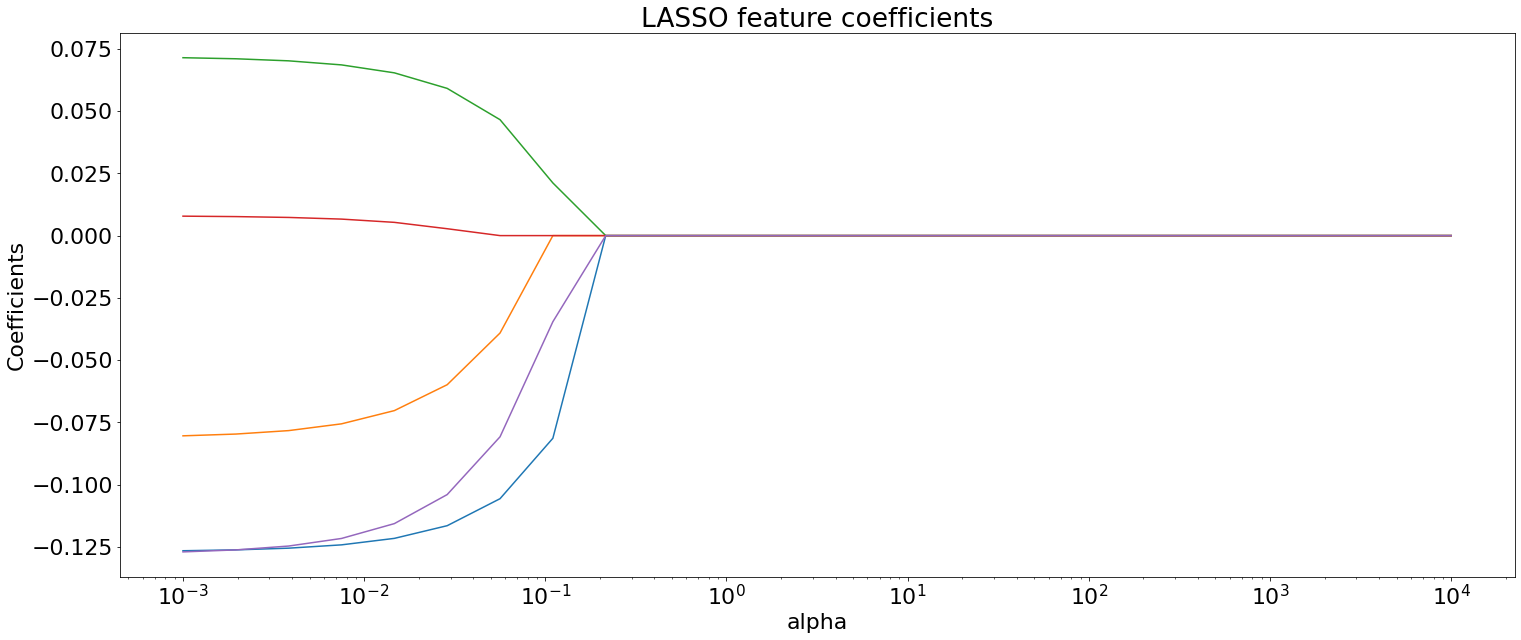

In [457]:
# Dividing dataset into X & Y 
X = data.iloc[:,0:39]
X_new = data.iloc[:,0:39]
X.shape
Y = data.iloc[:,39:40]
Y.shape
# Normalising data
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)
scalar.fit(Y)
Y = scalar.transform(Y)
# Using SelectKBest to identify top 10 features
selector = SelectKBest(f_regression, k=5)
fit = selector.fit(X,np.ravel(Y,order='C'))
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_new.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features
X_selected = SelectKBest(f_regression, k=5).fit_transform(X, np.ravel(Y,order='C'))
X_selected.shape
#Split data set into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_selected,Y, test_size = 0.3, random_state=7)
#alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
alphas = np.logspace(-3, 4,num=25,base=10)
lasso = Lasso(max_iter = 100000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_title('LASSO feature coefficients')
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')

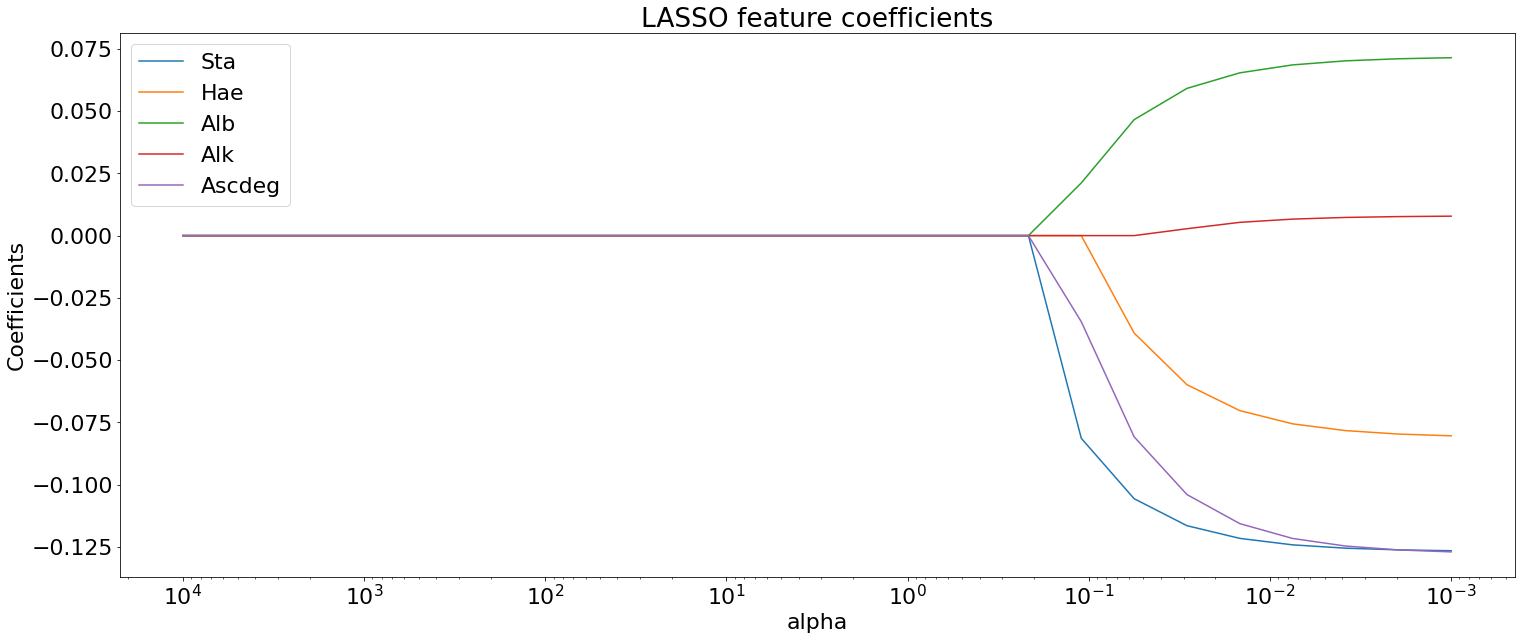

          Alphas       Sta       Hae       Alb       Alk    Ascdeg
0       0.001000 -0.126582 -0.080424  0.071458  0.007811 -0.127045
1       0.001957 -0.126235 -0.079715  0.071032  0.007636 -0.126250
2       0.003831 -0.125549 -0.078327  0.070201  0.007298 -0.124694
3       0.007499 -0.124220 -0.075612  0.068571  0.006630 -0.121649
4       0.014678 -0.121617 -0.070297  0.065381  0.005323 -0.115689
5       0.028730 -0.116522 -0.059893  0.059136  0.002763 -0.104023
6       0.056234 -0.105676 -0.039133  0.046563  0.000000 -0.080820
7       0.110069 -0.081405 -0.000000  0.021156  0.000000 -0.034586
8       0.215443 -0.000000 -0.000000  0.000000  0.000000 -0.000000
9       0.421697 -0.000000 -0.000000  0.000000  0.000000 -0.000000
10      0.825404 -0.000000 -0.000000  0.000000  0.000000 -0.000000
11      1.615598 -0.000000 -0.000000  0.000000  0.000000 -0.000000
12      3.162278 -0.000000 -0.000000  0.000000  0.000000 -0.000000
13      6.189658 -0.000000 -0.000000  0.000000  0.000000 -0.00

In [448]:
coefs = DataFrame(coefs)
coefs.insert(loc=0, column= 'Alphas', value = alphas)
#coefs.columns =['Alphas','Sta','Hae','Alb','Alk','Ascdeg','Thr','LMet','Sym','Bil','IntNorRat']
coefs.columns =['Alphas','Sta','Hae','Alb','Alk','Ascdeg'] 
coefs
ax=coefs.set_index('Alphas').astype(float).plot()
ax.set_xlabel('Alpha')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.set_ylim([0,1])
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('LASSO feature coefficients')
plt.axis('tight')
plt.show()
print(coefs)

In [452]:
# alphas = np.logspace(-10,1,10,base=10)
# #alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
lassocv = LassoCV(alphas = alphas, max_iter = 10000)
lassocv.fit(X_train, np.ravel(y_train,order='C'))
print("Alpha fit value")
print(lassocv.alpha_)
print("\n")
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse = mean_squared_error(y_test,y_pred_lasso)
print("Mean Square Error")
print(mse)
print("\n")
r2_score_lasso = r2_score(y_test,y_pred_lasso)
print("r2_score for test data")
print(r2_score_lasso)
print("\n")
r2_train_lasso = r2_score(y_train,lasso.predict(X_train))
print("r2_score for training data")
print(r2_train_lasso)
print("\n")

Alpha fit value
0.003831186849557289


Mean Square Error
0.21409445386882775


r2_score for test data
0.07267715961521459


r2_score for training data
0.2970978838451833




It can be observed that performance of models increased after using SelectKBest and LASSO performed relatively better than Ridge regression